In [8]:
import pandas as pd

df = pd.read_csv('../data/raw//Last.fm_data.csv')
print(df.head())

   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


In [9]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166153 entries, 0 to 166152
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  166153 non-null  int64 
 1   Username    166153 non-null  object
 2   Artist      166153 non-null  object
 3   Track       166153 non-null  object
 4   Album       166141 non-null  object
 5   Date        166153 non-null  object
 6   Time        166153 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.9+ MB
None
          Unnamed: 0
count  166153.000000
mean   123210.070682
std     80248.930071
min         0.000000
25%     52401.000000
50%    117509.000000
75%    191651.000000
max    265628.000000


In [10]:
print(df.isnull().sum()) #count null values per column

Unnamed: 0     0
Username       0
Artist         0
Track          0
Album         12
Date           0
Time           0
dtype: int64


In [11]:
df.dropna()

,Unnamed: 0,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21
...,...,...,...,...,...,...,...
166148,265624,Orlenay,Kelly Lee Owens,Arpeggi,Inner Song,30 Jan 2021,18:30
166149,265625,Orlenay,Caterina Barbieri,Bow of Perception,Ecstatic Computation,30 Jan 2021,18:19
166150,265626,Orlenay,Caterina Barbieri,Pinnacles of You,Ecstatic Computation,30 Jan 2021,18:13
166151,265627,Orlenay,Caterina Barbieri,Arrows of Time,Ecstatic Computation,30 Jan 2021,18:08


In [12]:
df = df.drop_duplicates()

In [13]:
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'Username', 'Artist', 'Track', 'Album', 'Date', 'Time'], dtype='object')


In [14]:
df['play_count'] = df.groupby(['Username', 'Track'])['Track'].transform('count')

In [15]:
print(df.head())

   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  play_count  
0  Ballad of the Broken Seas  31 Jan 2021   23:36           1  
1  Ballad of the Broken Seas  31 Jan 2021   23:32           1  
2  Ballad of the Broken Seas  31 Jan 2021   23:28           1  
3  Ballad of the Broken Seas  31 Jan 2021   23:25           1  
4  Ballad of the Broken Seas  31 Jan 2021   23:21           1  


In [16]:
df_filtered = df[df['play_count'] > 1]

In [17]:
print(df_filtered[['Username', 'Track', 'play_count']].drop_duplicates())

       Username                                      Track  play_count
22      Babs_05                             Brace Yourself           2
23      Babs_05                                   Badibaba           6
24      Babs_05  Big Climb - Jack Foals Grouse Party Remix           6
26      Babs_05                                 Fellowship           2
27      Babs_05              Bad to Tha Bone (feat. Giggs)           2
...         ...                                        ...         ...
166087  Orlenay                            BROWN SKIN GIRL           2
166088  Orlenay                           DON'T JEALOUS ME           2
166089  Orlenay                                     BIGGER           3
166095  Orlenay           MOOD 4 EVA (feat. Oumou Sangaré)           2
166104  Orlenay               the stars (mufasa interlude)           2

[22540 rows x 3 columns]


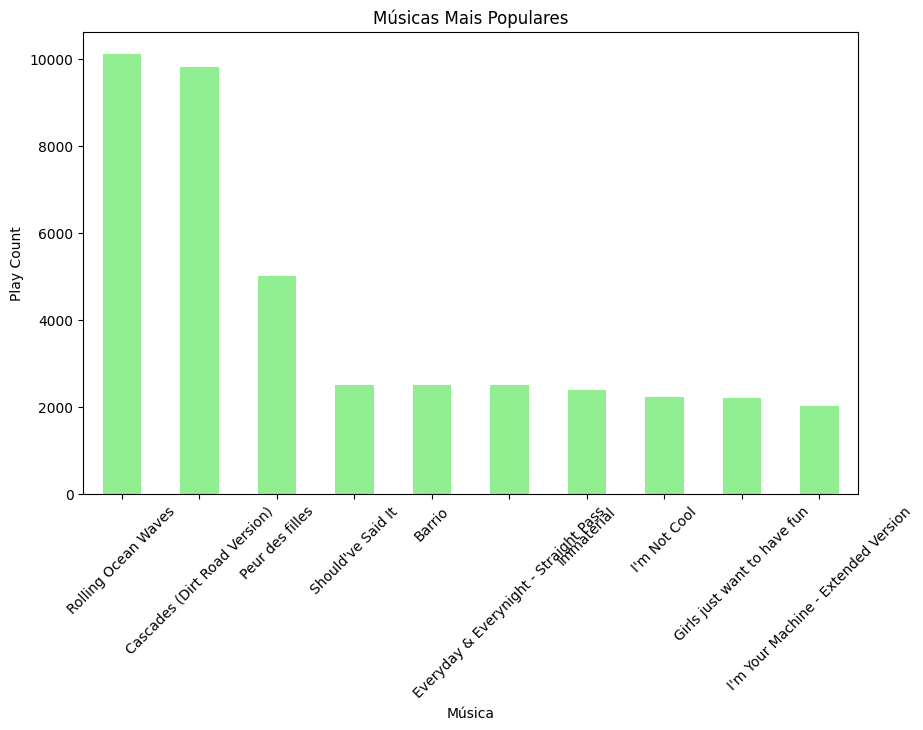

In [ ]:
import matplotlib.pyplot as plt

global_play_counts = df_filtered.groupby('Track')['play_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
global_play_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Músicas Mais Populares')
plt.xlabel('Música')
plt.ylabel('Play Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
max_play_count = df['play_count'].max()

top_songs = df[df['play_count'] == max_play_count]

print("Músicas com o maior play_count:")
print(top_songs[['Username', 'Track', 'play_count']].drop_duplicates())

Músicas com o maior play_count:
          Username                                  Track  play_count
2980       Babs_05                      Should've Said It          50
23267      Babs_05                        Peur des filles          50
49075     franhale  Everyday & Everynight - Straight Pass          50
99842   massdosage                        Peur des filles          50
116468  Knapster01                                 Barrio          50
